In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
path = r"C:\Users\Personal\Documents\FIR\ML_Course\DNN_Project_1"

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df['Exited'].value_counts()  # inbalance data set

Exited
0    7963
1    2037
Name: count, dtype: int64

In [5]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [6]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.shape

(10000, 11)

In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)   # data became numeric

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
X = df.drop(columns=['Exited'])       
y = df['Exited'].values

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [15]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) # 20 % for testing 

In [17]:
X_train.shape

(8000, 11)

In [18]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False


In [19]:
from sklearn.preprocessing import StandardScaler    # do scaling for fast convergence 
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [20]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [21]:
X_test_trf

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [44]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [47]:
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))    # ist hidden layer recieving 11 features
model.add(Dense(1,activation='sigmoid'))            # output layer have one output nodes

#model.add(Dense(11,activation='sigmoid',input_dim=11))   
#model.add(Dense(11,activation='sigmoid'))


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])    # Model Complition include optimzer, loss etc

In [50]:
model.fit(X_train_trf,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 3s 3ms/step - loss: 0.6609 - accuracy: 0.6089
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5375 - accuracy: 0.7930
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4845 - accuracy: 0.7961
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4606 - accuracy: 0.7960
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4479 - accuracy: 0.7964
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4401 - accuracy: 0.7991
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4349 - accuracy: 0.8046
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4313 - accuracy: 0.8102
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4286 - accuracy: 0.8129
Epoch 10/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.8163

In [51]:
model.layers[0].get_weights()  # to check weight

[array([[-0.0313907 ,  0.11119452,  0.08510968],
        [ 0.48112044, -1.8705611 , -1.2667885 ],
        [-0.01149708,  0.3467933 ,  0.00445703],
        [ 0.42532253,  0.19257663, -0.3725207 ],
        [ 0.00643711,  0.22350663,  0.11418974],
        [ 0.33234   , -0.07583647,  0.23629385],
        [-1.2124122 ,  0.62242305,  0.2457405 ],
        [-0.19348265, -0.07020165, -0.11827592],
        [ 0.50770247, -0.7115389 , -0.28715992],
        [-0.04617218,  0.09331195, -0.07906482],
        [-0.36544764,  0.5859516 ,  0.28632447]], dtype=float32),
 array([-0.47493264,  0.68640935,  0.40001634], dtype=float32)]

In [52]:
y_pred = model.predict(X_test_trf)   # predicated value is not zero or 1 due to sigmoid function

In [53]:
y_pred

array([[0.21929139],
       [0.3544821 ],
       [0.15692224],
       ...,
       [0.17508826],
       [0.12733667],
       [0.19732937]], dtype=float32)

In [54]:

y_binary=np.where(y_pred>0.5,1,0)

In [58]:
y_binary

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_binary)

0.7975

In [66]:

#Fine tunning
model = Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))    # ist hidden layer recieving 11 features
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))            # output layer have one output nodes



In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_6 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])  

In [70]:
history= model.fit(X_train_trf,y_train,epochs=100, validation_split=0.2)  # store data in history

Epoch 1/100
200/200 [==============================] - 1s 5ms/step - loss: 0.5991 - accuracy: 0.6762 - val_loss: 0.4948 - val_accuracy: 0.7969
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4834 - accuracy: 0.7958 - val_loss: 0.4737 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4662 - accuracy: 0.7958 - val_loss: 0.4590 - val_accuracy: 0.7969
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4513 - accuracy: 0.7956 - val_loss: 0.4463 - val_accuracy: 0.7956
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4395 - accuracy: 0.8011 - val_loss: 0.4381 - val_accuracy: 0.8119
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4318 - accuracy: 0.8084 - val_loss: 0.4344 - val_accuracy: 0.8131
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4276 - accuracy: 0.8116 - val_loss: 0.4316 - val_accuracy: 0.8050

In [72]:
history.history

{'loss': [0.5991199612617493,
  0.48338377475738525,
  0.46618402004241943,
  0.4513185918331146,
  0.4395454525947571,
  0.4317886233329773,
  0.4275854527950287,
  0.4252392053604126,
  0.42366746068000793,
  0.4222840964794159,
  0.420725017786026,
  0.4192603826522827,
  0.4181502163410187,
  0.41669848561286926,
  0.4153984487056732,
  0.41403746604919434,
  0.4128834009170532,
  0.41206514835357666,
  0.41059279441833496,
  0.4094364643096924,
  0.40820637345314026,
  0.4068000018596649,
  0.40556713938713074,
  0.4041968286037445,
  0.4027102589607239,
  0.4007374942302704,
  0.39918196201324463,
  0.39737072587013245,
  0.39546069502830505,
  0.39342793822288513,
  0.3915543854236603,
  0.38977280259132385,
  0.38736584782600403,
  0.38559651374816895,
  0.38406074047088623,
  0.3823431730270386,
  0.3803458511829376,
  0.3784976899623871,
  0.37681347131729126,
  0.37515464425086975,
  0.3733724355697632,
  0.37173110246658325,
  0.3698275685310364,
  0.36861053109169006,
  0.

In [73]:
import matplotlib.pyplot as plt

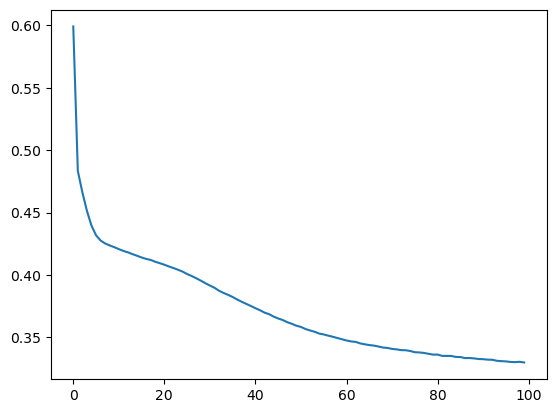

In [74]:
plt.plot(history.history['loss'])

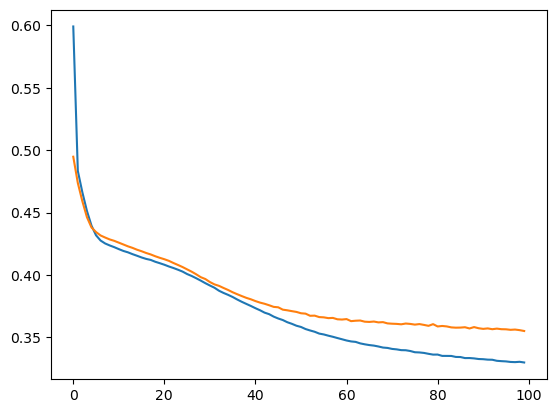

In [76]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

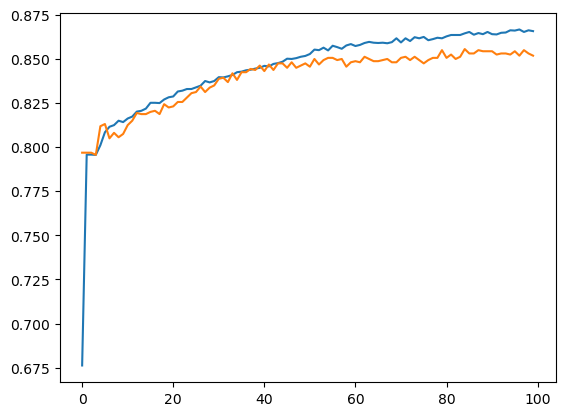

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])